# Alpha Vantage API

In [12]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader
from pandas_datareader import data as wb
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [13]:
from alpha_vantage.timeseries import TimeSeries

In [14]:
ts = TimeSeries(key = '88CPK7BNFO69DPDI', output_format = 'pandas')

In [15]:
INTC_av, metadata = ts.get_daily_adjusted('INTC', outputsize = 'full')
INTC_av.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
1998-01-02,70.69,72.63,70.50,72.63,11.7977,10231800.0,0.0,1.0
1998-01-05,73.06,75.14,72.00,74.50,12.1015,19592100.0,0.0,1.0
1998-01-06,73.88,74.31,72.69,73.13,11.8790,12078400.0,0.0,1.0
1998-01-07,72.75,73.63,71.56,72.75,11.8172,13845200.0,0.0,1.0
1998-01-08,72.25,74.81,72.13,74.31,12.0706,18932600.0,0.0,1.0


In [16]:
#'GSPC' = S&P500, 'DJI' = Dow Jones Index
GSPC_av, metadata = ts.get_daily_adjusted('^GSPC', outputsize = 'full')
GSPC_av.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2000-01-03,1469.25,1478.00,1438.3600,1455.22,1455.22,9.318000e+08,0.0,1.0
2000-01-04,1455.22,1455.22,1397.4301,1399.42,1399.42,1.009000e+09,0.0,1.0
2000-01-05,1399.42,1413.27,1377.6801,1402.11,1402.11,1.085500e+09,0.0,1.0
2000-01-06,1402.11,1411.90,1392.1000,1403.45,1403.45,1.092300e+09,0.0,1.0
2000-01-07,1403.45,1441.47,1400.7300,1441.47,1441.47,1.225200e+09,0.0,1.0


In [18]:
pfolio = pd.concat([INTC_av['5. adjusted close'], GSPC_av['5. adjusted close']], axis = 1, sort = False)
pfolio.head()

,5. adjusted close,5. adjusted close
1998-01-02,11.7977,NaN
1998-01-05,12.1015,NaN
1998-01-06,11.8790,NaN
1998-01-07,11.8172,NaN
1998-01-08,12.0706,NaN


In [20]:
INTC = INTC_av
GSPC = GSPC_av

In [21]:
pfolio.columns = ['INTC', 'S&P500']
pfolio.tail()

,INTC,S&P500
2019-05-22,44.00,2856.2700
2019-05-23,44.53,2822.2400
2019-05-24,44.57,2826.0601
2019-05-28,43.57,2802.3899
2019-05-29,44.23,2783.0200


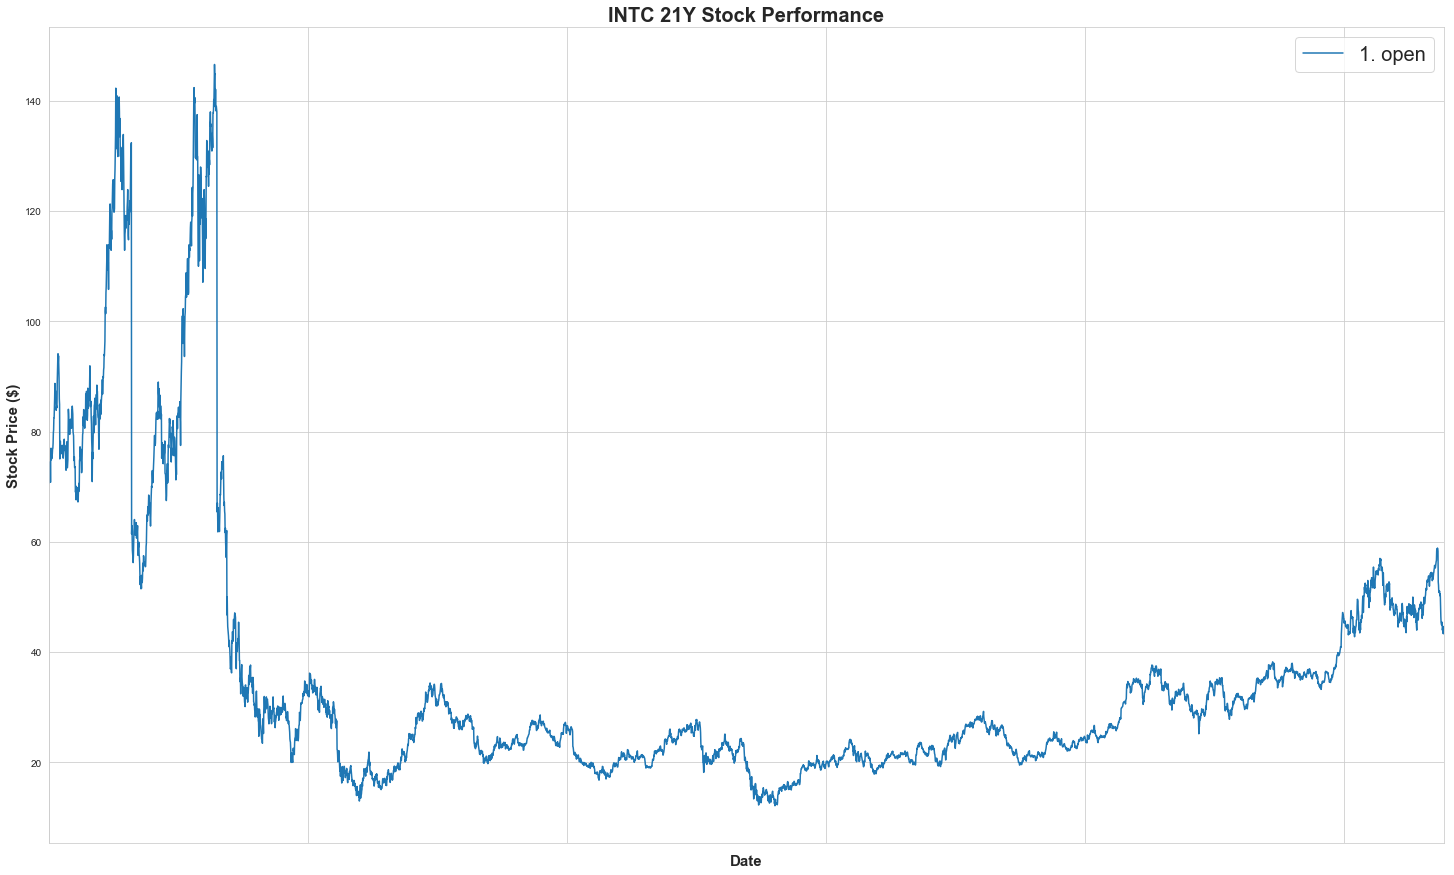

In [22]:
INTC['1. open'].plot(legend = True, figsize = (25,15))
plt.title('INTC 21Y Stock Performance', fontsize = 20, weight = 'bold')
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Stock Price ($)', fontsize = 15, weight = 'bold')
plt.legend(prop = {'size': 20})
plt.margins(x = 0)
plt.show()